## Credit Card Dataset Analysis Using K-means Clustering

In [37]:
import pandas as pd
import numpy as np

In [38]:
x=pd.read_csv('C:/Users/admin/Desktop/Imarticus/credit_card.csv')
df=pd.DataFrame(x)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [40]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Primary analysis of several categorical features reveal

### Exploratory Data Analysis tasks

In [41]:
df.shape

(8950, 18)

In [42]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [43]:
df.duplicated().sum()

0

#### Missing Value Analysis


In [44]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [45]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)
 
 

In [46]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [51]:
 for i in df:
    if df[i].dtype==object:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        df[i]=le.fit_transform(df[i])

#### Outlier Treatment using the Z-score method


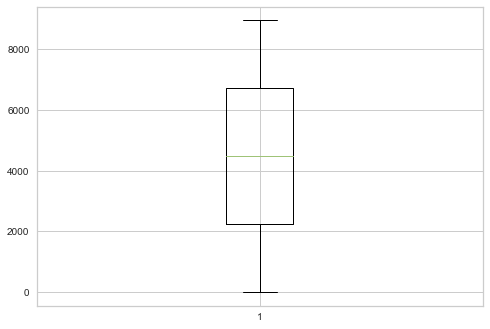

0          0
1          1
2          2
3          3
4          4
        ... 
8945    8945
8946    8946
8947    8947
8948    8948
8949    8949
Name: CUST_ID, Length: 8950, dtype: int32


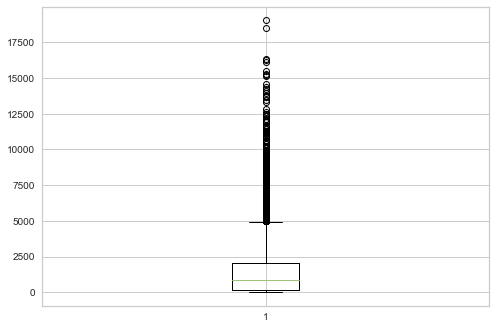

0         40.900749
1       3202.467416
2       2495.148862
3       1666.670542
4        817.714335
           ...     
8945      28.493517
8946      19.183215
8947      23.398673
8948      13.457564
8949     372.708075
Name: BALANCE, Length: 8950, dtype: float64


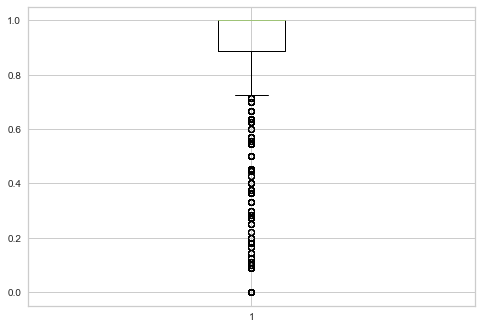

0       0.818182
1       0.909091
2       1.000000
3       0.636364
4       1.000000
          ...   
8945    1.000000
8946    1.000000
8947    0.833333
8948    0.833333
8949    0.666667
Name: BALANCE_FREQUENCY, Length: 8950, dtype: float64


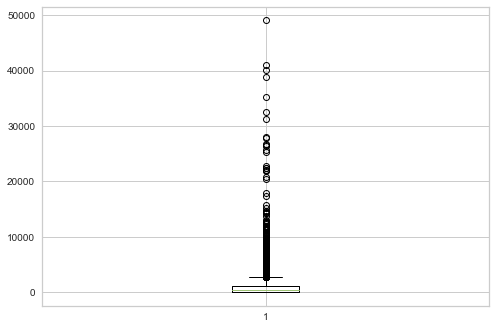

0         95.40
1          0.00
2        773.17
3       1499.00
4         16.00
         ...   
8945     291.12
8946     300.00
8947     144.40
8948       0.00
8949    1093.25
Name: PURCHASES, Length: 8950, dtype: float64


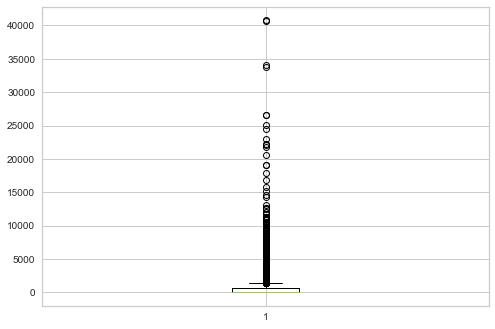

0          0.00
1          0.00
2        773.17
3       1499.00
4         16.00
         ...   
8945       0.00
8946       0.00
8947       0.00
8948       0.00
8949    1093.25
Name: ONEOFF_PURCHASES, Length: 8950, dtype: float64


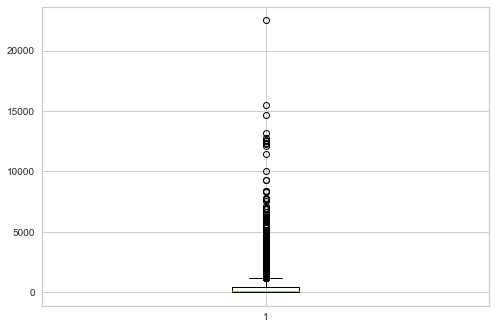

0        95.40
1         0.00
2         0.00
3         0.00
4         0.00
         ...  
8945    291.12
8946    300.00
8947    144.40
8948      0.00
8949      0.00
Name: INSTALLMENTS_PURCHASES, Length: 8950, dtype: float64


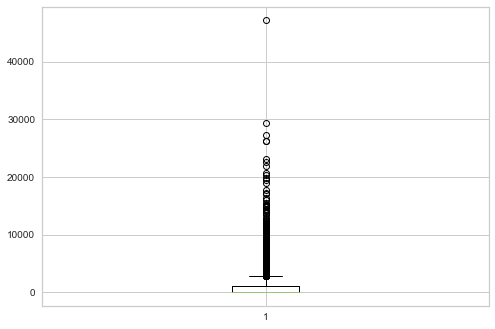

0          0.000000
1       6442.945483
2          0.000000
3        205.788017
4          0.000000
           ...     
8945       0.000000
8946       0.000000
8947       0.000000
8948      36.558778
8949     127.040008
Name: CASH_ADVANCE, Length: 8950, dtype: float64


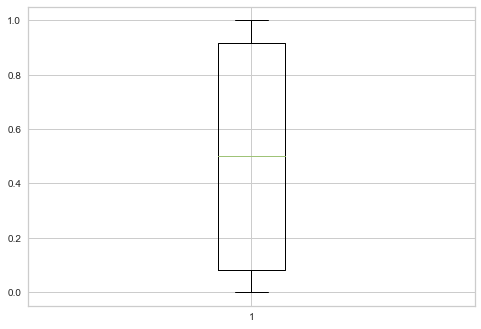

0       0.166667
1       0.000000
2       1.000000
3       0.083333
4       0.083333
          ...   
8945    1.000000
8946    1.000000
8947    0.833333
8948    0.000000
8949    0.666667
Name: PURCHASES_FREQUENCY, Length: 8950, dtype: float64


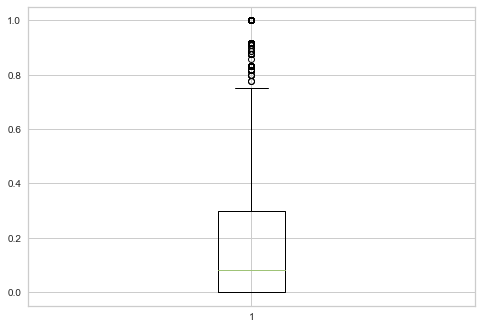

0       0.000000
1       0.000000
2       1.000000
3       0.083333
4       0.083333
          ...   
8945    0.000000
8946    0.000000
8947    0.000000
8948    0.000000
8949    0.666667
Name: ONEOFF_PURCHASES_FREQUENCY, Length: 8950, dtype: float64


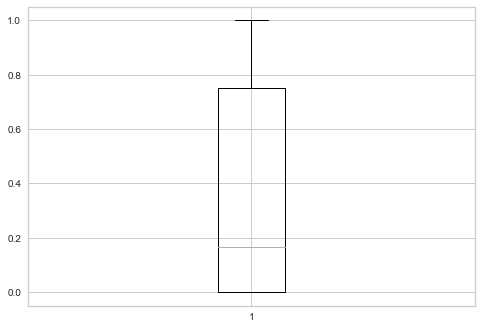

0       0.083333
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
8945    0.833333
8946    0.833333
8947    0.666667
8948    0.000000
8949    0.000000
Name: PURCHASES_INSTALLMENTS_FREQUENCY, Length: 8950, dtype: float64


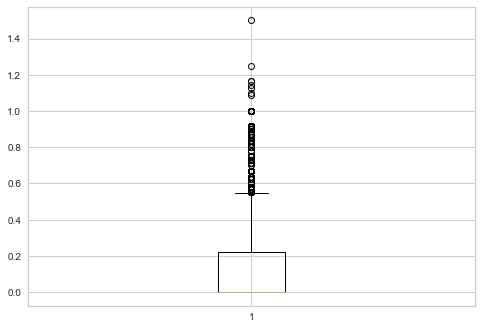

0       0.000000
1       0.250000
2       0.000000
3       0.083333
4       0.000000
          ...   
8945    0.000000
8946    0.000000
8947    0.000000
8948    0.166667
8949    0.333333
Name: CASH_ADVANCE_FREQUENCY, Length: 8950, dtype: float64


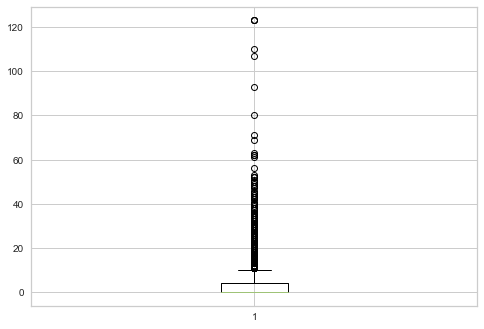

0       0
1       4
2       0
3       1
4       0
       ..
8945    0
8946    0
8947    0
8948    2
8949    2
Name: CASH_ADVANCE_TRX, Length: 8950, dtype: int64


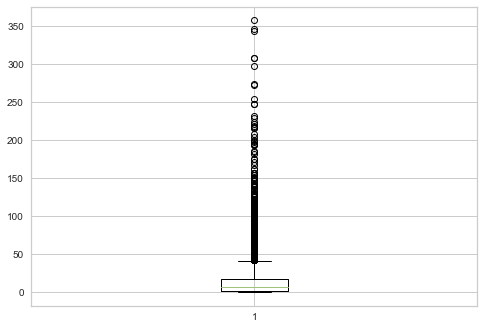

0        2
1        0
2       12
3        1
4        1
        ..
8945     6
8946     6
8947     5
8948     0
8949    23
Name: PURCHASES_TRX, Length: 8950, dtype: int64


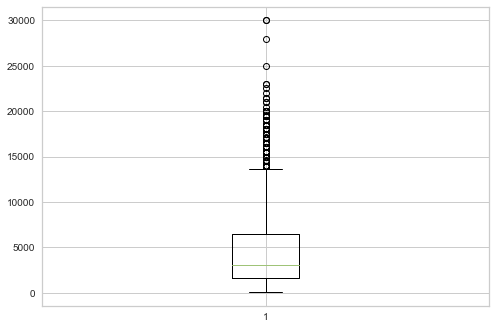

0       1000.0
1       7000.0
2       7500.0
3       7500.0
4       1200.0
         ...  
8945    1000.0
8946    1000.0
8947    1000.0
8948     500.0
8949    1200.0
Name: CREDIT_LIMIT, Length: 8950, dtype: float64


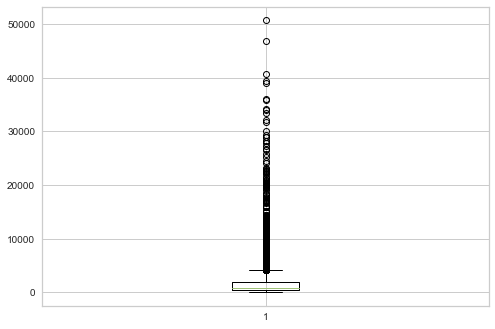

0        201.802084
1       4103.032597
2        622.066742
3          0.000000
4        678.334763
           ...     
8945     325.594462
8946     275.861322
8947      81.270775
8948      52.549959
8949      63.165404
Name: PAYMENTS, Length: 8950, dtype: float64


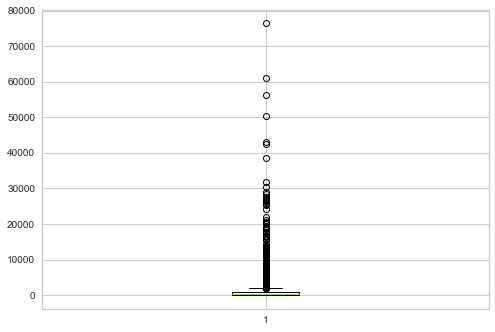

0        139.509787
1       1072.340217
2        627.284787
3        864.206542
4        244.791237
           ...     
8945      48.886365
8946     864.206542
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64


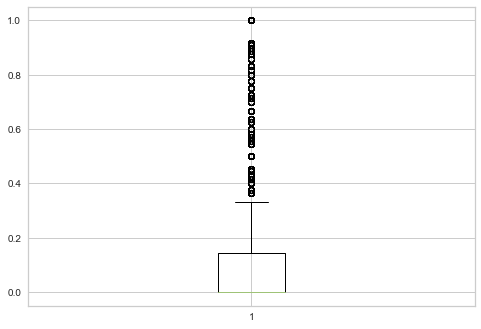

0       0.000000
1       0.222222
2       0.000000
3       0.000000
4       0.000000
          ...   
8945    0.500000
8946    0.000000
8947    0.250000
8948    0.250000
8949    0.000000
Name: PRC_FULL_PAYMENT, Length: 8950, dtype: float64


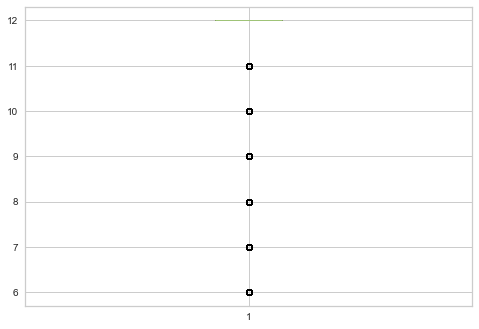

0       12
1       12
2       12
3       12
4       12
        ..
8945     6
8946     6
8947     6
8948     6
8949     6
Name: TENURE, Length: 8950, dtype: int64


In [52]:
import matplotlib.pyplot as plt
for i in df:
    plt.boxplot(df[i])
    plt.show()
    print(df[i])

lowerbound: -4474.5
upperbound: 13423.5
0          0
1          1
2          2
3          3
4          4
        ... 
8945    8945
8946    8946
8947    8947
8948    8948
8949    8949
Name: CUST_ID, Length: 8950, dtype: int32


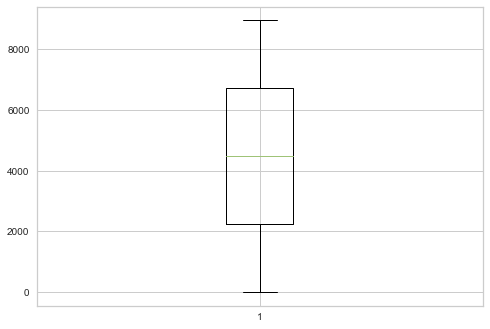

lowerbound: -2760.5052645
upperbound: 4942.9272155
0         40.900749
1       3202.467416
2       2495.148862
3       1666.670542
4        817.714335
           ...     
8945      28.493517
8946      19.183215
8947      23.398673
8948      13.457564
8949     372.708075
Name: BALANCE, Length: 8950, dtype: float64


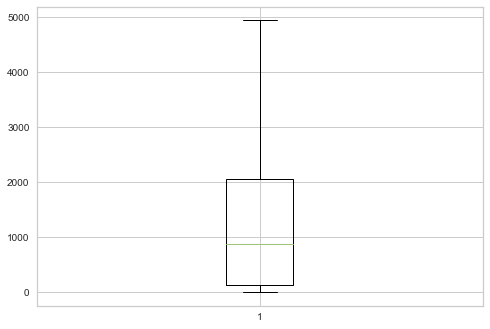

lowerbound: 0.7222225000000001
upperbound: 1.1666664999999998
0       0.818182
1       0.909091
2       1.000000
3       0.636364
4       1.000000
          ...   
8945    1.000000
8946    1.000000
8947    0.833333
8948    0.833333
8949    0.666667
Name: BALANCE_FREQUENCY, Length: 8950, dtype: float64


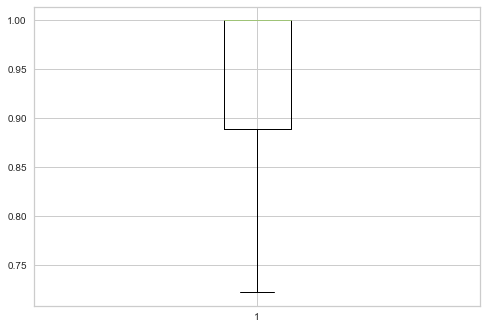

lowerbound: -1566.1075000000003
upperbound: 2715.8725000000004
0         95.40
1          0.00
2        773.17
3       1499.00
4         16.00
         ...   
8945     291.12
8946     300.00
8947     144.40
8948       0.00
8949    1093.25
Name: PURCHASES, Length: 8950, dtype: float64


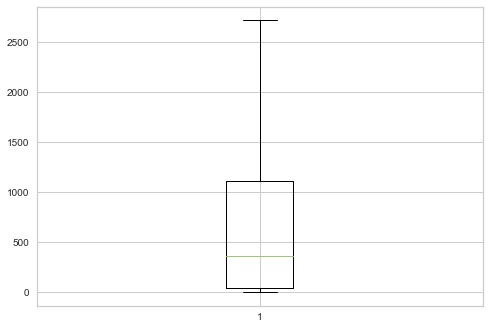

lowerbound: -866.1075
upperbound: 1443.5124999999998
0          0.00
1          0.00
2        773.17
3       1499.00
4         16.00
         ...   
8945       0.00
8946       0.00
8947       0.00
8948       0.00
8949    1093.25
Name: ONEOFF_PURCHASES, Length: 8950, dtype: float64


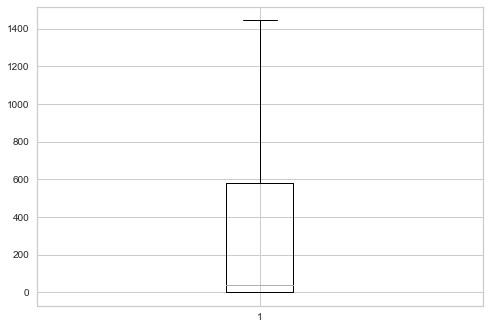

lowerbound: -702.95625
upperbound: 1171.59375
0        95.40
1         0.00
2         0.00
3         0.00
4         0.00
         ...  
8945    291.12
8946    300.00
8947    144.40
8948      0.00
8949      0.00
Name: INSTALLMENTS_PURCHASES, Length: 8950, dtype: float64


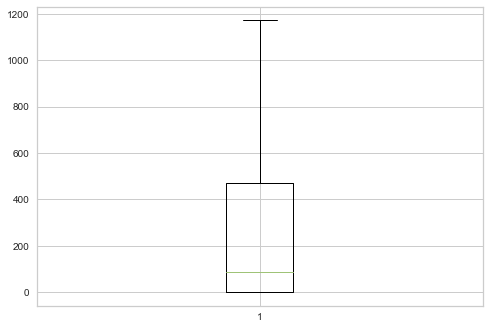

lowerbound: -1670.7317088750003
upperbound: 2784.5528481250003
0          0.000000
1       6442.945483
2          0.000000
3        205.788017
4          0.000000
           ...     
8945       0.000000
8946       0.000000
8947       0.000000
8948      36.558778
8949     127.040008
Name: CASH_ADVANCE, Length: 8950, dtype: float64


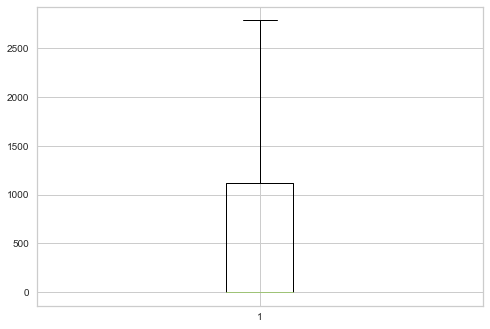

lowerbound: -1.166668
upperbound: 2.166668
0       0.166667
1       0.000000
2       1.000000
3       0.083333
4       0.083333
          ...   
8945    1.000000
8946    1.000000
8947    0.833333
8948    0.000000
8949    0.666667
Name: PURCHASES_FREQUENCY, Length: 8950, dtype: float64


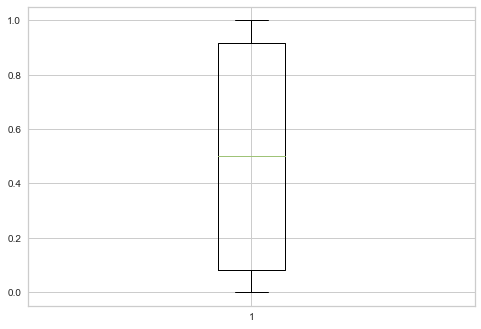

lowerbound: -0.44999999999999996
upperbound: 0.75
0       0.000000
1       0.000000
2       1.000000
3       0.083333
4       0.083333
          ...   
8945    0.000000
8946    0.000000
8947    0.000000
8948    0.000000
8949    0.666667
Name: ONEOFF_PURCHASES_FREQUENCY, Length: 8950, dtype: float64


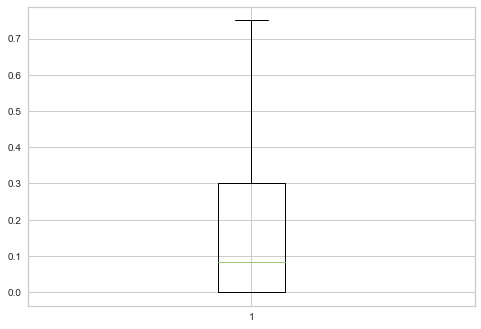

lowerbound: -1.125
upperbound: 1.875
0       0.083333
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
8945    0.833333
8946    0.833333
8947    0.666667
8948    0.000000
8949    0.000000
Name: PURCHASES_INSTALLMENTS_FREQUENCY, Length: 8950, dtype: float64


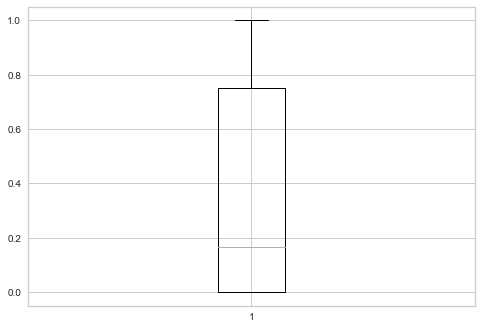

lowerbound: -0.333333
upperbound: 0.555555
0       0.000000
1       0.250000
2       0.000000
3       0.083333
4       0.000000
          ...   
8945    0.000000
8946    0.000000
8947    0.000000
8948    0.166667
8949    0.333333
Name: CASH_ADVANCE_FREQUENCY, Length: 8950, dtype: float64


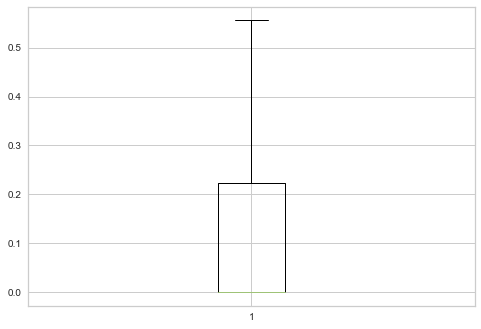

lowerbound: -6.0
upperbound: 10.0
0       0
1       4
2       0
3       1
4       0
       ..
8945    0
8946    0
8947    0
8948    2
8949    2
Name: CASH_ADVANCE_TRX, Length: 8950, dtype: int64


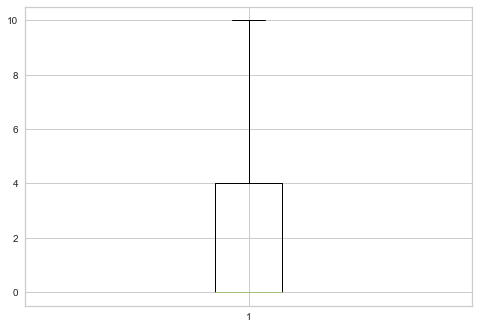

lowerbound: -23.0
upperbound: 41.0
0        2
1        0
2       12
3        1
4        1
        ..
8945     6
8946     6
8947     5
8948     0
8949    23
Name: PURCHASES_TRX, Length: 8950, dtype: int64


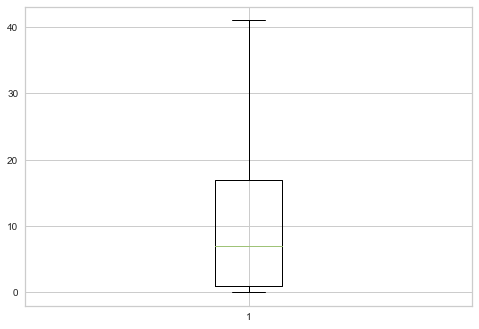

lowerbound: -5750.0
upperbound: 13850.0
0       1000.0
1       7000.0
2       7500.0
3       7500.0
4       1200.0
         ...  
8945    1000.0
8946    1000.0
8947    1000.0
8948     500.0
8949    1200.0
Name: CREDIT_LIMIT, Length: 8950, dtype: float64


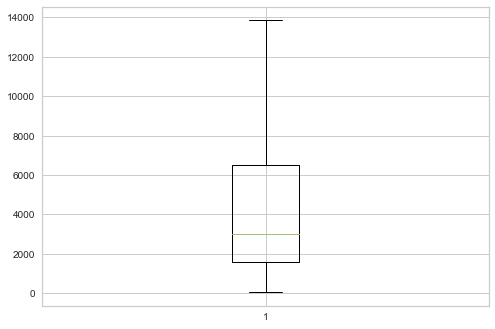

lowerbound: -1893.5110601250003
upperbound: 4177.921542875
0        201.802084
1       4103.032597
2        622.066742
3          0.000000
4        678.334763
           ...     
8945     325.594462
8946     275.861322
8947      81.270775
8948      52.549959
8949      63.165404
Name: PAYMENTS, Length: 8950, dtype: float64


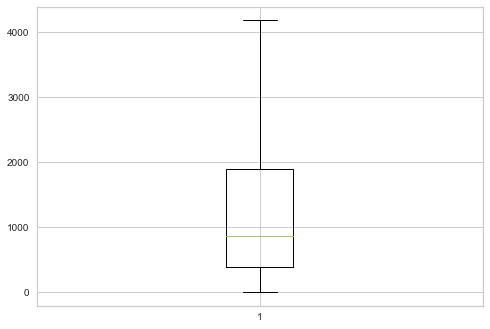

lowerbound: -869.1656778326224
upperbound: 1904.229874387704
0        139.509787
1       1072.340217
2        627.284787
3        864.206542
4        244.791237
           ...     
8945      48.886365
8946     864.206542
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64


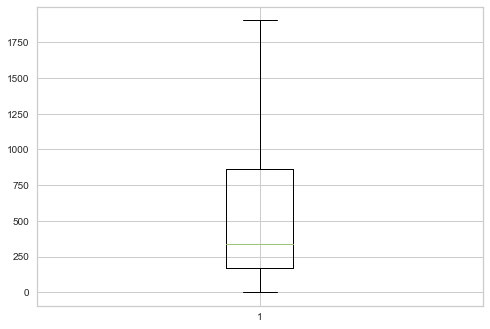

lowerbound: -0.21428550000000002
upperbound: 0.35714250000000003
0       0.000000
1       0.222222
2       0.000000
3       0.000000
4       0.000000
          ...   
8945    0.500000
8946    0.000000
8947    0.250000
8948    0.250000
8949    0.000000
Name: PRC_FULL_PAYMENT, Length: 8950, dtype: float64


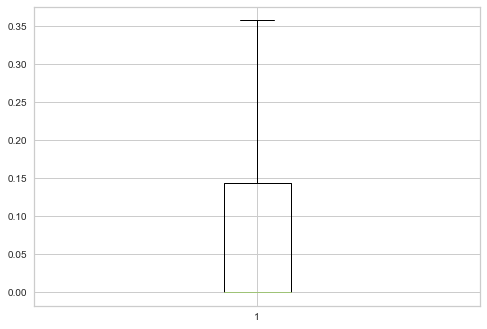

lowerbound: 12.0
upperbound: 12.0
0       12
1       12
2       12
3       12
4       12
        ..
8945     6
8946     6
8947     6
8948     6
8949     6
Name: TENURE, Length: 8950, dtype: int64


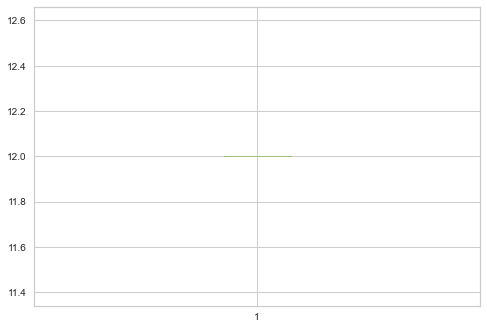

In [53]:
for i in df:
    minimum_value=df[i].min()
    maximum_value=df[i].max()
    q1=df[i].quantile(0.25)
    q2=df[i].quantile(0.5)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    lower_cutoff=q1-1.5*iqr
    print("lowerbound:",lower_cutoff)
    upper_cutoff=q3+1.5*iqr
    print("upperbound:",upper_cutoff)
    #print(df[i])
     
    print(df[i])
    df[i].clip(upper=upper_cutoff,inplace=True)
    df[i].clip(lower=lower_cutoff,inplace=True)
    plt.boxplot(df[i])
    plt.show() 


#### Z-score method


In [54]:
#mean = np.mean(df['BALANCE'])
#std = np.std(df['BALANCE'])
#print((df['BALANCE']-mean)/std)

#### Perform dimensionality reduction using PCA such that the 95% of the variance is explained


In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test=train_test_split(x,test_size=0.2,random_state=0)
x_train.shape,x_test.shape

((7160, 18), (1790, 18))

In [56]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
pca

PCA(n_components=0.95)

In [57]:
pca.fit(x_train)
x_train_transformed=pca.transform(x_train)
print(x_train_transformed.shape)

(7160, 5)


In [66]:
x_test_transformed=pca.transform(x_test)
print(x_test_transformed.shape)

(1790, 5)


In [67]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
     kmeans = KMeans(n_clusters=num_clusters)
         kmeans.fit(data_frame)
             Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,’bx-’)
plt.xlabel(‘Values of K’) 
plt.ylabel(‘Sum of squared distances/Inertia’) 
plt.title(‘Elbow Method For Optimal k’)
plt.show()

IndentationError: unexpected indent (Temp/ipykernel_1936/2622203594.py, line 5)

#### Find the optimum value of k for k-means clustering using the elbow method

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(df)       
df = sc.transform(df) 

In [59]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
 

In [60]:
 
n_clusters = [4, 5, 6, 7, 8]
for K in n_clusters :
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df)
    
    score = silhouette_score(df , predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 4, silhouette score is 0.19245789197116747)
For n_clusters = 5, silhouette score is 0.1800525948725748)
For n_clusters = 6, silhouette score is 0.180382671691196)
For n_clusters = 7, silhouette score is 0.18367493519921452)
For n_clusters = 8, silhouette score is 0.17853831873394968)


###### From my observation in the above solution the optimum value for K is associated with the highest value of the Silhouette score. From the above output it can be seen that, for K = 7, the silhouette score is high. Thus, we build the clusters with K = 7

In [61]:
  
model = KMeans(n_clusters= 7, random_state= 10)

 
model.fit(df)

KMeans(n_clusters=7, random_state=10)

#### Plot the elbow curve

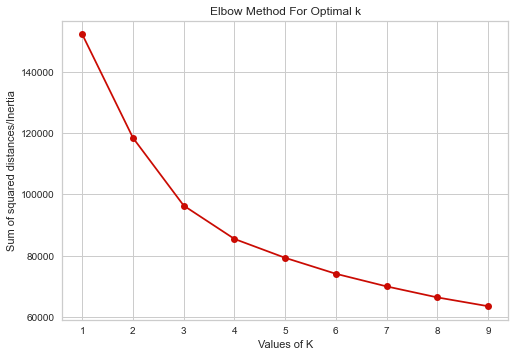

In [78]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances, marker='o', color='r')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

#### Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [87]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df, cluster_labels))
 

In [84]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

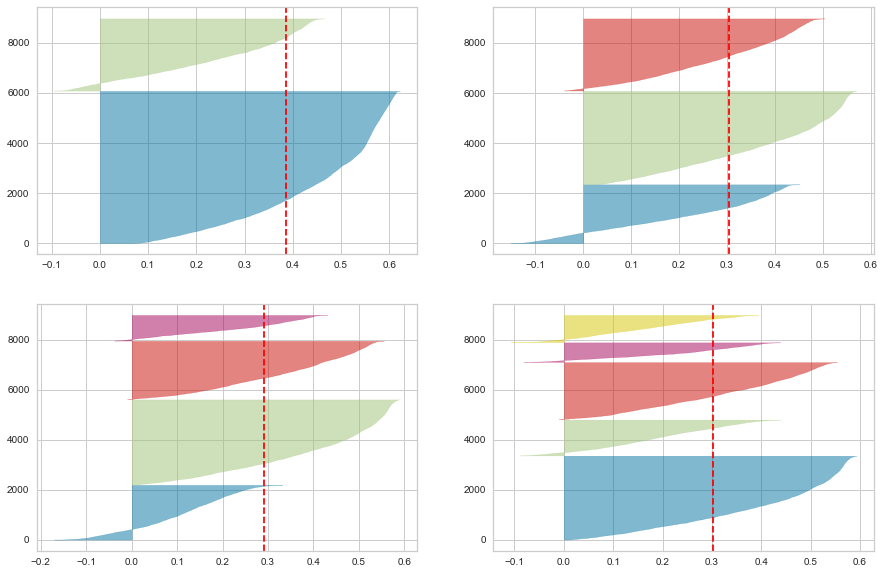

In [85]:
fig,ax=plt.subplots(2,2,figsize=(15,10))
for i in [2,3,4,5]:
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=100,random_state=42)
    q,mod=divmod(i,2)
     
    visualizer=SilhouetteVisualizer(km,colors='yellowbrick',ax=ax[q-1][mod])
    visualizer.fit(x)